In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

# linear dataset

In [2]:
np.random.seed(42)

In [3]:
X,y = make_blobs(n_samples=10000,centers=4,n_features=10,random_state=42)
X = X + np.random.normal(scale=5,size=X.shape)

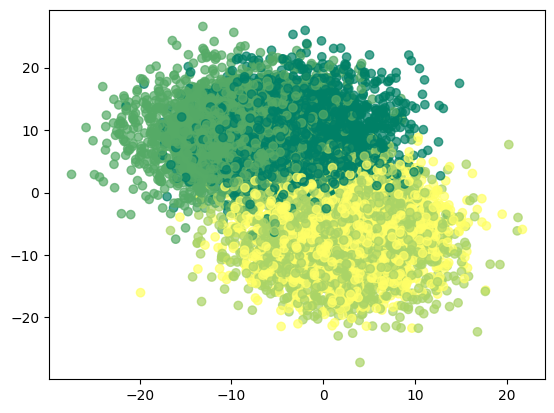

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

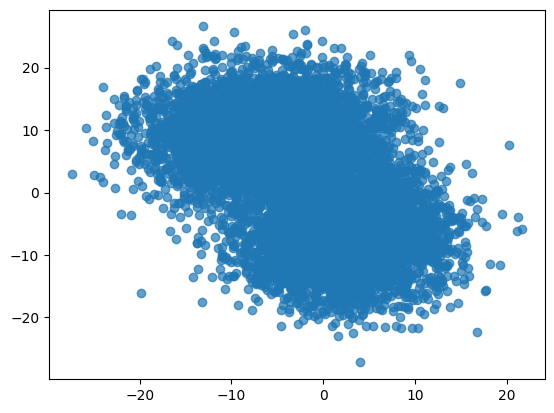

In [5]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [6]:
X.shape

(10000, 10)

In [7]:
df_linear = pd.DataFrame(X) 

In [8]:
df_linear.columns = [f"vab_{col+1}" for col in df_linear.columns]

In [9]:
df_linear['target'] = y

In [10]:
df_linear

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,0.467491,9.278825,7.068561,8.782917,-8.030122,-9.583016,-1.212004,11.413573,1.459564,7.276970,0
1,-11.592235,7.412776,8.671865,-16.954165,-16.564488,-8.471637,-8.622948,1.290722,-5.536911,-12.644896,1
2,-1.872588,7.716225,7.327901,-13.593380,-8.180689,-4.530203,-9.621116,3.716095,-4.204219,-4.719373,1
3,-0.360377,1.150108,-4.331577,-6.873749,3.792235,-0.889219,-4.123714,-11.181592,-4.595532,-8.470683,2
4,0.090823,9.554719,5.274735,0.609368,-11.952908,-10.086013,-10.949472,12.300018,3.873933,-4.806219,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.087723,5.754271,5.432613,-12.470215,-5.260593,-14.646548,-8.456604,0.697770,2.987708,-6.035019,1
9996,10.664492,-5.758848,-10.762305,14.238793,12.842246,7.904141,2.997692,-9.194972,7.093028,-3.421145,3
9997,-4.205459,3.215102,5.721812,7.439639,-7.552248,-7.330253,-21.945606,9.619469,-3.927295,9.693450,0
9998,-5.357584,5.873093,4.027123,1.200800,-2.147839,-3.288702,-6.662106,-7.892669,3.983766,-6.306023,1


In [11]:
df_linear['target'].value_counts()

target
0    2500
1    2500
2    2500
3    2500
Name: count, dtype: int64

In [12]:
# sns.pairplot(df_linear)

<Axes: ylabel='Density'>

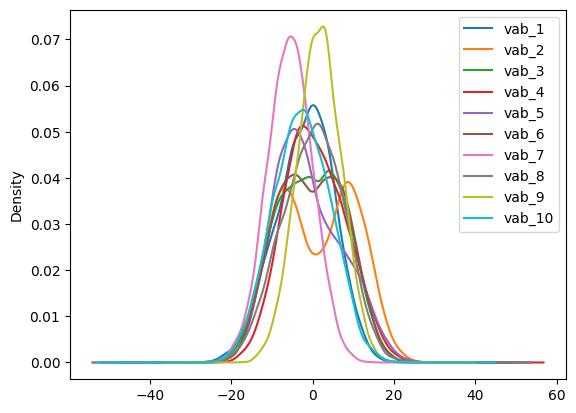

In [13]:
df_linear.iloc[:,:-1].plot(kind='density')

### correlation matrix

In [14]:
df_linear.iloc[:,:-1].corr()

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10
vab_1,1.000000,-0.488534,-0.470998,0.320838,0.381234,0.449414,-0.014063,-0.208794,0.195200,-0.065392
vab_2,-0.488534,1.000000,0.633521,-0.268397,-0.536040,-0.653314,-0.113730,0.432828,-0.165487,0.324225
vab_3,-0.470998,0.633521,1.000000,-0.397138,-0.572686,-0.577367,-0.106984,0.434678,-0.193766,0.160497
vab_4,0.320838,-0.268397,-0.397138,1.000000,0.450400,0.266201,0.003648,-0.276552,0.229349,0.259092
vab_5,0.381234,-0.536040,-0.572686,0.450400,1.000000,0.517488,0.161766,-0.526338,0.175716,-0.072649
vab_6,0.449414,-0.653314,-0.577367,0.266201,0.517488,1.000000,0.115875,-0.418888,0.167854,-0.287759
vab_7,-0.014063,-0.113730,-0.106984,0.003648,0.161766,0.115875,1.000000,-0.242045,-0.039498,-0.145081
vab_8,-0.208794,0.432828,0.434678,-0.276552,-0.526338,-0.418888,-0.242045,1.000000,-0.078536,0.171056
vab_9,0.195200,-0.165487,-0.193766,0.229349,0.175716,0.167854,-0.039498,-0.078536,1.000000,0.069508
vab_10,-0.065392,0.324225,0.160497,0.259092,-0.072649,-0.287759,-0.145081,0.171056,0.069508,1.000000


<Axes: >

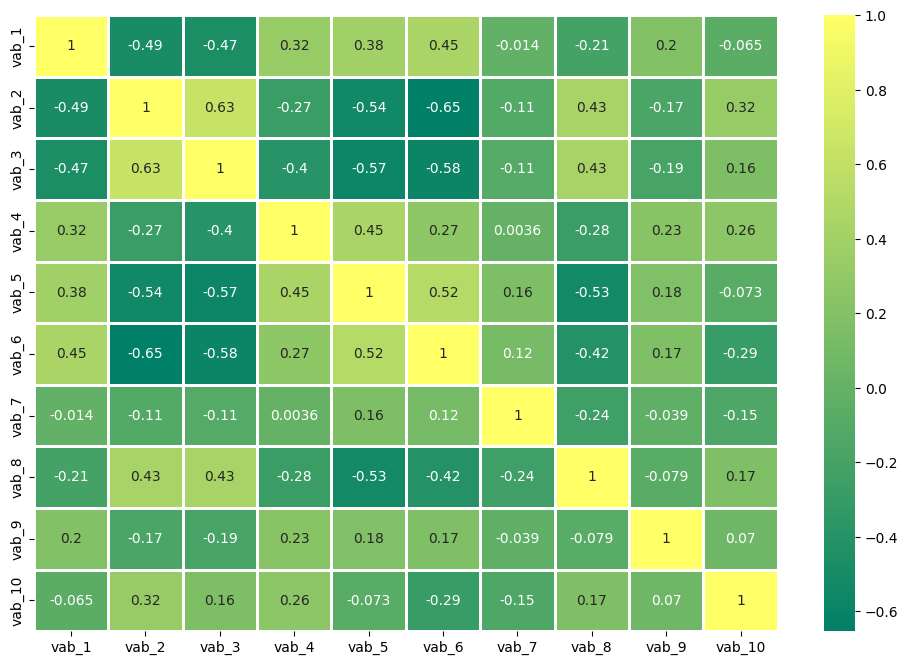

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [16]:
X_values = df_linear.iloc[:,:-1].values

In [17]:
y_values = df_linear.iloc[:,-1].values

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_values = scaler.fit_transform(X_values)

In [21]:
np.mean(X_values),np.std(X_values)

(5.771738642579294e-16, 1.0)

In [22]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,0.337989,0.852415,0.917396,1.094744,-0.832091,-1.146646,0.789945,1.522091,-0.018035,1.409533
1,-1.366848,0.657049,1.113748,-2.346504,-1.860820,-1.009062,-0.543889,0.170152,-1.316055,-1.433391
2,0.007181,0.688818,0.949157,-1.897141,-0.850240,-0.521131,-0.723540,0.494068,-1.068807,-0.302389
3,0.220956,0.001378,-0.478742,-0.998674,0.592971,-0.070395,0.265891,-1.495566,-1.141406,-0.837715
4,0.284741,0.881299,0.697712,0.001877,-1.304942,-1.208914,-0.962620,1.640478,0.429891,-0.314783
...,...,...,...,...,...,...,...,...,...,...
9995,-0.730062,0.483411,0.717047,-1.746965,-0.498253,-1.773487,-0.513950,0.090961,0.265474,-0.490137
9996,1.779499,-0.721956,-1.266293,1.824237,1.683855,1.018182,1.547613,-1.230246,1.027113,-0.117127
9997,-0.322608,0.217572,0.752464,0.915137,-0.774488,-0.867764,-2.941722,1.282482,-1.017431,1.754374
9998,-0.485479,0.495851,0.544921,0.080956,-0.123043,-0.367439,-0.190973,-1.056320,0.450268,-0.528810


<Axes: ylabel='Density'>

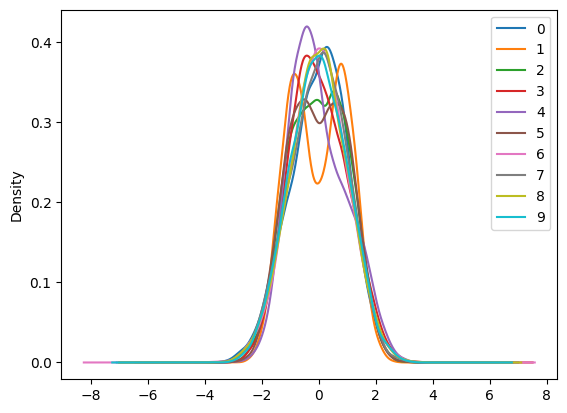

In [23]:
pd.DataFrame(X_values).plot(kind='density')

## pca application

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca_general = PCA()

In [26]:
pca_general.fit(X_values)

PCA()

In [27]:
explained_variance = pca_general.explained_variance_ratio_

In [28]:
explained_variance

array([0.38520707, 0.14588222, 0.1069863 , 0.08547884, 0.06909187,
       0.04945603, 0.04598146, 0.04032378, 0.03945173, 0.0321407 ])

In [29]:
eigenvalues = pca_general.explained_variance_

In [30]:
pd.DataFrame(eigenvalues)

,0
0,3.852456
1,1.458968
2,1.069970
3,0.854874
4,0.690988
5,0.494610
6,0.459861
7,0.403278
8,0.394557
9,0.321439


In [31]:
eigenvectors = pca_general.components_

### scree plot

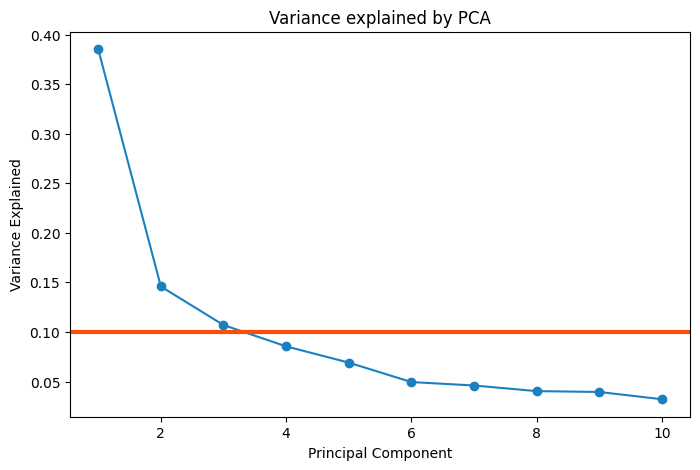

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [33]:
pca = PCA(n_components=2)

In [34]:
principal_components = pca.fit_transform(X_values)

In [35]:
pd.DataFrame(principal_components).head(8)

,0,1
0,1.729149,1.630145
1,3.079652,-2.503369
2,2.091626,-1.119527
3,-0.667196,-1.640007
4,2.106295,0.731962
5,0.894275,2.147922
6,1.212345,0.518357
7,1.673561,0.895672


In [36]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [37]:
final_df = pd.concat([principal_df,df_linear[['target']]],axis = 1)

In [38]:
final_df

,principal component 1,principal component 2,target
0,1.729149,1.630145,0
1,3.079652,-2.503369,1
2,2.091626,-1.119527,1
3,-0.667196,-1.640007,2
4,2.106295,0.731962,0
...,...,...,...
9995,2.094377,-0.760440,1
9996,-3.701352,0.692351,3
9997,2.017119,2.435375,0
9998,0.303674,-0.196164,1


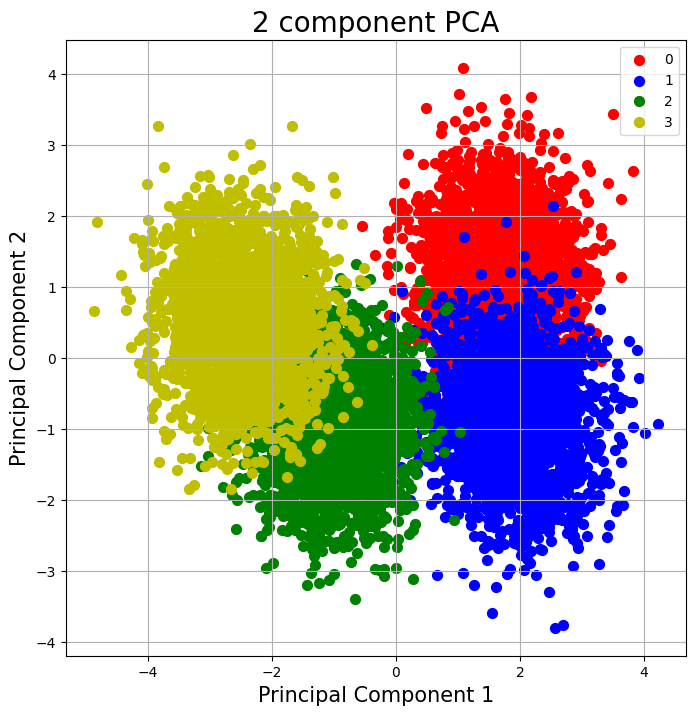

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

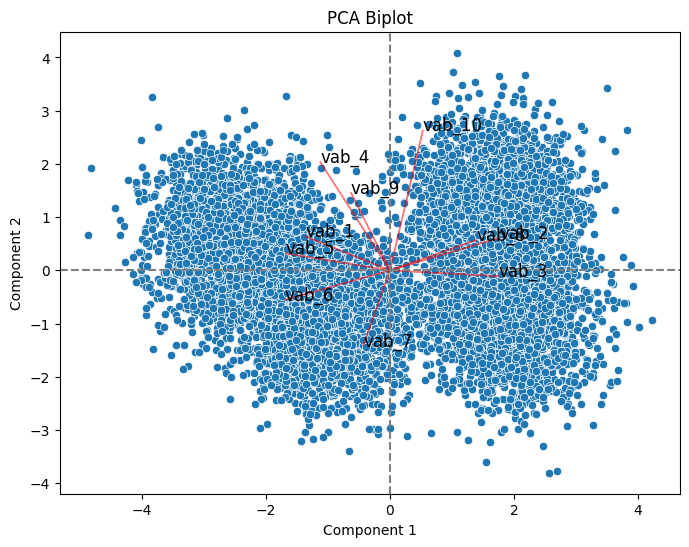

In [40]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

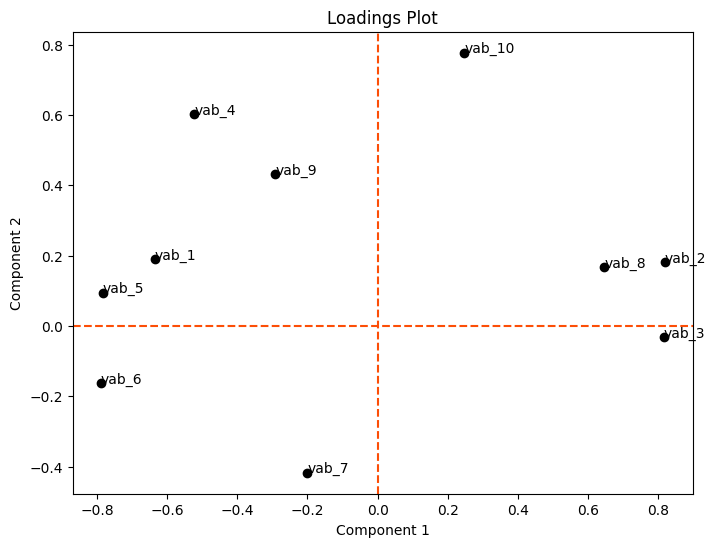

In [41]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [42]:
scores_pca = pca.transform(X_values)

In [43]:
pd.DataFrame(scores_pca).head()

,0,1
0,1.729149,1.630145
1,3.079652,-2.503369
2,2.091626,-1.119527
3,-0.667196,-1.640007
4,2.106295,0.731962


## t-SNE

In [44]:
from sklearn.manifold import TSNE

In [45]:
tsne = TSNE(n_components=2,random_state=42)

In [46]:
X_tsne = tsne.fit_transform(X_values)

In [47]:
tsne_data = np.vstack((X_tsne.T,df_linear['target'])).T

In [48]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [49]:
tsne_df

,dim_1,dim_2,target
0,38.644676,18.503998,0.0
1,56.399731,-42.135387,1.0
2,54.096004,-39.530647,1.0
3,0.297695,-20.319942,2.0
4,22.790623,29.480310,0.0
...,...,...,...
9995,42.492203,-18.438784,1.0
9996,-85.829155,-4.425604,3.0
9997,55.203342,46.151909,0.0
9998,27.813879,-16.238089,1.0


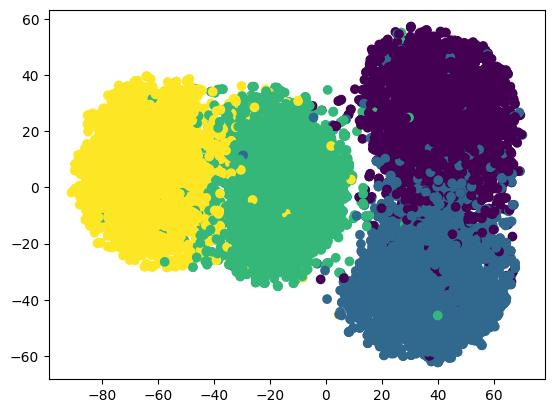

In [50]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [51]:
tsne.kl_divergence_

2.693162202835083

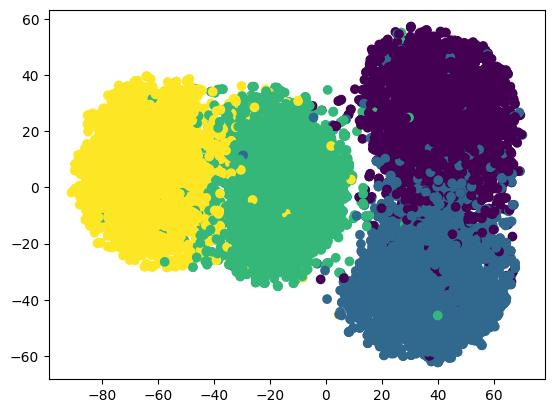

In [52]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [53]:
from sklearn.cluster import KMeans

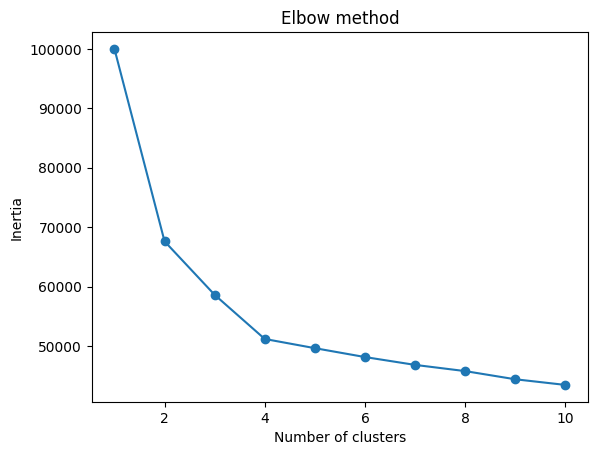

In [54]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=4,init='k-means++')

In [56]:
kmeans.fit(X_values)

KMeans(n_clusters=4)

In [57]:
df_linear['k_means'] = kmeans.labels_

In [58]:
df_linear

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,0.467491,9.278825,7.068561,8.782917,-8.030122,-9.583016,-1.212004,11.413573,1.459564,7.276970,0,1
1,-11.592235,7.412776,8.671865,-16.954165,-16.564488,-8.471637,-8.622948,1.290722,-5.536911,-12.644896,1,1
2,-1.872588,7.716225,7.327901,-13.593380,-8.180689,-4.530203,-9.621116,3.716095,-4.204219,-4.719373,1,1
3,-0.360377,1.150108,-4.331577,-6.873749,3.792235,-0.889219,-4.123714,-11.181592,-4.595532,-8.470683,2,0
4,0.090823,9.554719,5.274735,0.609368,-11.952908,-10.086013,-10.949472,12.300018,3.873933,-4.806219,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.087723,5.754271,5.432613,-12.470215,-5.260593,-14.646548,-8.456604,0.697770,2.987708,-6.035019,1,1
9996,10.664492,-5.758848,-10.762305,14.238793,12.842246,7.904141,2.997692,-9.194972,7.093028,-3.421145,3,3
9997,-4.205459,3.215102,5.721812,7.439639,-7.552248,-7.330253,-21.945606,9.619469,-3.927295,9.693450,0,1
9998,-5.357584,5.873093,4.027123,1.200800,-2.147839,-3.288702,-6.662106,-7.892669,3.983766,-6.306023,1,1


In [59]:
from scipy.optimize import linear_sum_assignment

y_true = df_linear['target'].values  
y_kmeans = df_linear['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_linear['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_linear['k_means'] == y_true))

accuracy before: 0.3777
accuracy after: 0.6059


In [60]:
df_linear

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,0.467491,9.278825,7.068561,8.782917,-8.030122,-9.583016,-1.212004,11.413573,1.459564,7.276970,0,0
1,-11.592235,7.412776,8.671865,-16.954165,-16.564488,-8.471637,-8.622948,1.290722,-5.536911,-12.644896,1,0
2,-1.872588,7.716225,7.327901,-13.593380,-8.180689,-4.530203,-9.621116,3.716095,-4.204219,-4.719373,1,0
3,-0.360377,1.150108,-4.331577,-6.873749,3.792235,-0.889219,-4.123714,-11.181592,-4.595532,-8.470683,2,2
4,0.090823,9.554719,5.274735,0.609368,-11.952908,-10.086013,-10.949472,12.300018,3.873933,-4.806219,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.087723,5.754271,5.432613,-12.470215,-5.260593,-14.646548,-8.456604,0.697770,2.987708,-6.035019,1,0
9996,10.664492,-5.758848,-10.762305,14.238793,12.842246,7.904141,2.997692,-9.194972,7.093028,-3.421145,3,1
9997,-4.205459,3.215102,5.721812,7.439639,-7.552248,-7.330253,-21.945606,9.619469,-3.927295,9.693450,0,0
9998,-5.357584,5.873093,4.027123,1.200800,-2.147839,-3.288702,-6.662106,-7.892669,3.983766,-6.306023,1,0


In [61]:
print(np.unique(df_linear['target']))

[0 1 2 3]


In [62]:
print(np.unique(kmeans.labels_))

[0 1 2 3]


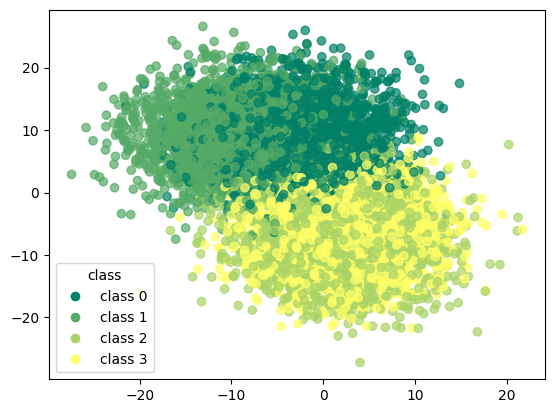

In [63]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_linear['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

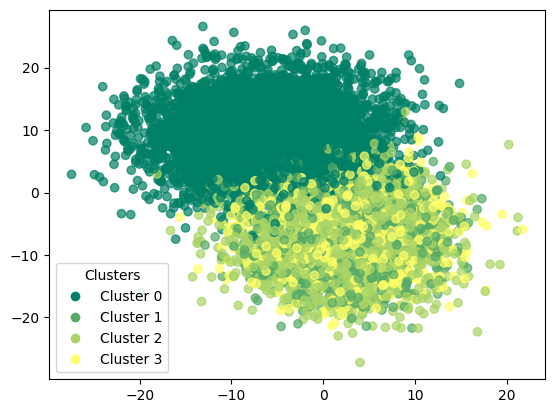

In [64]:
scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_linear['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [65]:
kmeans.cluster_centers_

array([[ 0.55911099, -0.86691243, -0.45584267, -0.47650892,  0.00736136,
         0.73871922, -0.06889272,  0.06604094,  0.01409328, -0.97669776],
       [-0.58566097,  0.84950072,  0.75125258, -0.33374105, -0.65363325,
        -0.77855213, -0.14987167,  0.52665747, -0.20712737,  0.37774141],
       [ 0.58784586, -0.79889878, -1.01216626,  1.09544368,  1.22717423,
         0.80873107, -0.20643182, -1.08000181,  0.9568427 ,  0.25203842],
       [ 0.61019415, -0.83493442, -1.01037176,  1.06481965,  1.255588  ,
         0.79258749,  0.90050469, -1.05445623, -0.18531174,  0.12057656]])

In [66]:
print(confusion_matrix(df_linear['target'],df_linear['k_means']))

[[2489    0   10    1]
 [2472    1   27    0]
 [  14   79 2341   66]
 [   0 1229   43 1228]]


In [67]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2500
           1       0.00      0.00      0.00      2500
           2       0.97      0.94      0.95      2500
           3       0.95      0.49      0.65      2500

    accuracy                           0.61     10000
   macro avg       0.60      0.61      0.57     10000
weighted avg       0.60      0.61      0.57     10000



### clustering with pca

In [68]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i,init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

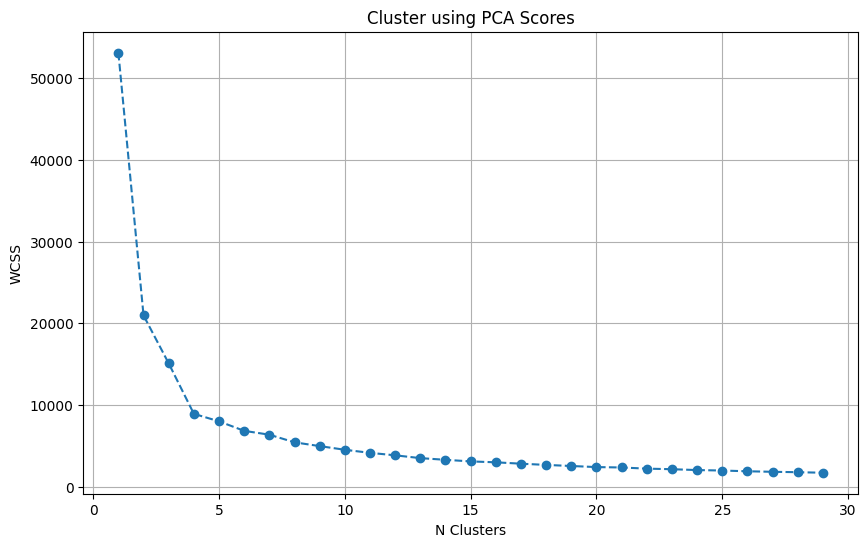

In [69]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o",linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [70]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [71]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [72]:
df_pca_kmeans = df_linear.copy()

In [73]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [74]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,0.467491,9.278825,7.068561,8.782917,-8.030122,-9.583016,-1.212004,11.413573,1.459564,7.276970,0,0,3
1,-11.592235,7.412776,8.671865,-16.954165,-16.564488,-8.471637,-8.622948,1.290722,-5.536911,-12.644896,1,0,0
2,-1.872588,7.716225,7.327901,-13.593380,-8.180689,-4.530203,-9.621116,3.716095,-4.204219,-4.719373,1,0,0
3,-0.360377,1.150108,-4.331577,-6.873749,3.792235,-0.889219,-4.123714,-11.181592,-4.595532,-8.470683,2,2,2
4,0.090823,9.554719,5.274735,0.609368,-11.952908,-10.086013,-10.949472,12.300018,3.873933,-4.806219,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.087723,5.754271,5.432613,-12.470215,-5.260593,-14.646548,-8.456604,0.697770,2.987708,-6.035019,1,0,0
9996,10.664492,-5.758848,-10.762305,14.238793,12.842246,7.904141,2.997692,-9.194972,7.093028,-3.421145,3,1,1
9997,-4.205459,3.215102,5.721812,7.439639,-7.552248,-7.330253,-21.945606,9.619469,-3.927295,9.693450,0,0,3
9998,-5.357584,5.873093,4.027123,1.200800,-2.147839,-3.288702,-6.662106,-7.892669,3.983766,-6.306023,1,0,2


In [75]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.2482
accuracy after: 0.9121


In [76]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,0.467491,9.278825,7.068561,8.782917,-8.030122,-9.583016,-1.212004,11.413573,1.459564,7.276970,0,0,0
1,-11.592235,7.412776,8.671865,-16.954165,-16.564488,-8.471637,-8.622948,1.290722,-5.536911,-12.644896,1,0,1
2,-1.872588,7.716225,7.327901,-13.593380,-8.180689,-4.530203,-9.621116,3.716095,-4.204219,-4.719373,1,0,1
3,-0.360377,1.150108,-4.331577,-6.873749,3.792235,-0.889219,-4.123714,-11.181592,-4.595532,-8.470683,2,2,2
4,0.090823,9.554719,5.274735,0.609368,-11.952908,-10.086013,-10.949472,12.300018,3.873933,-4.806219,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.087723,5.754271,5.432613,-12.470215,-5.260593,-14.646548,-8.456604,0.697770,2.987708,-6.035019,1,0,1
9996,10.664492,-5.758848,-10.762305,14.238793,12.842246,7.904141,2.997692,-9.194972,7.093028,-3.421145,3,1,3
9997,-4.205459,3.215102,5.721812,7.439639,-7.552248,-7.330253,-21.945606,9.619469,-3.927295,9.693450,0,0,0
9998,-5.357584,5.873093,4.027123,1.200800,-2.147839,-3.288702,-6.662106,-7.892669,3.983766,-6.306023,1,0,2


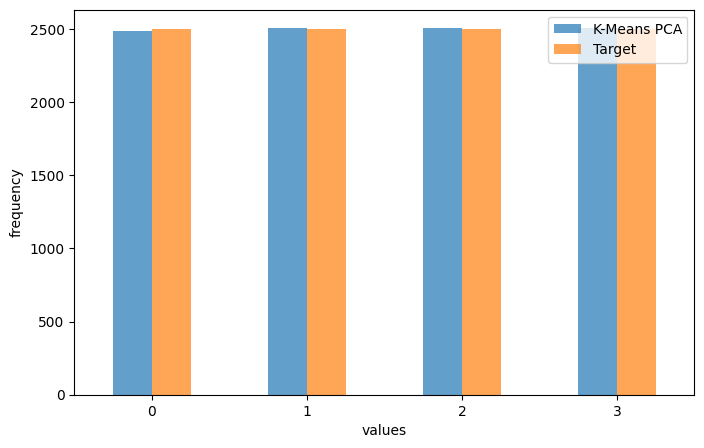

In [77]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [78]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[2278  215    7    0]
 [ 193 2274   33    0]
 [  13   17 2267  203]
 [   0    0  198 2302]]


In [79]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2500
           1       0.91      0.91      0.91      2500
           2       0.90      0.91      0.91      2500
           3       0.92      0.92      0.92      2500

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



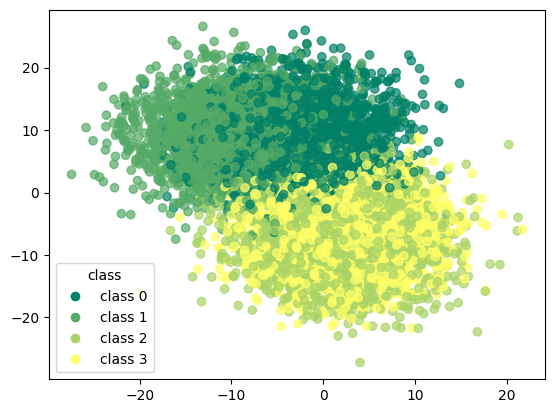

In [80]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

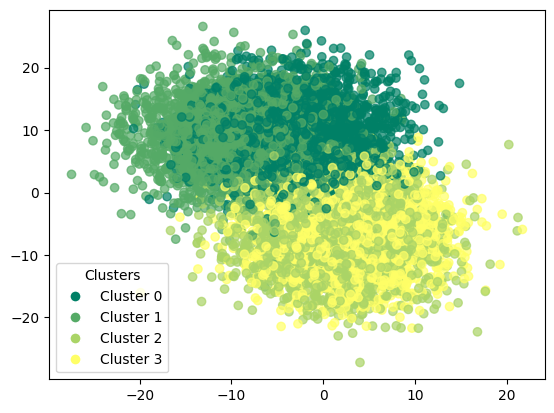

In [81]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

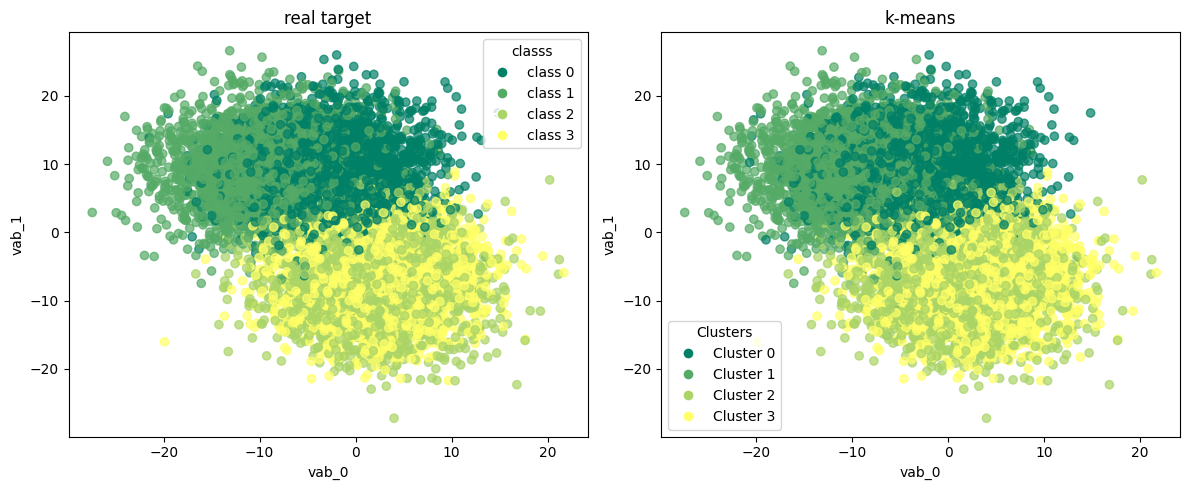

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

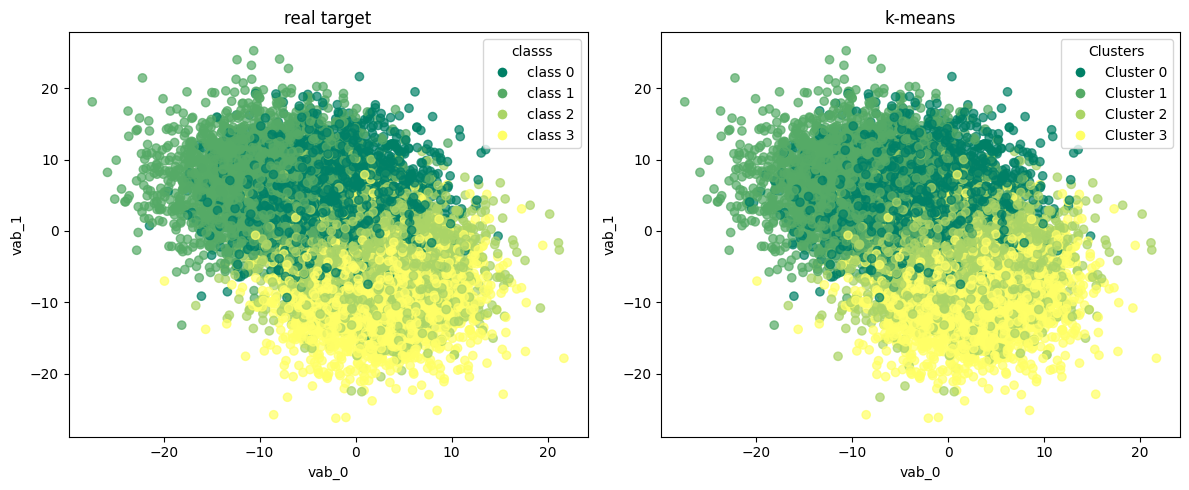

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

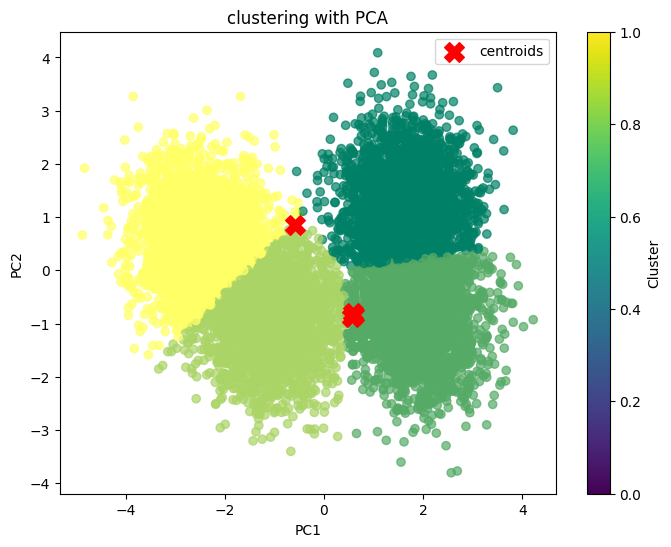

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

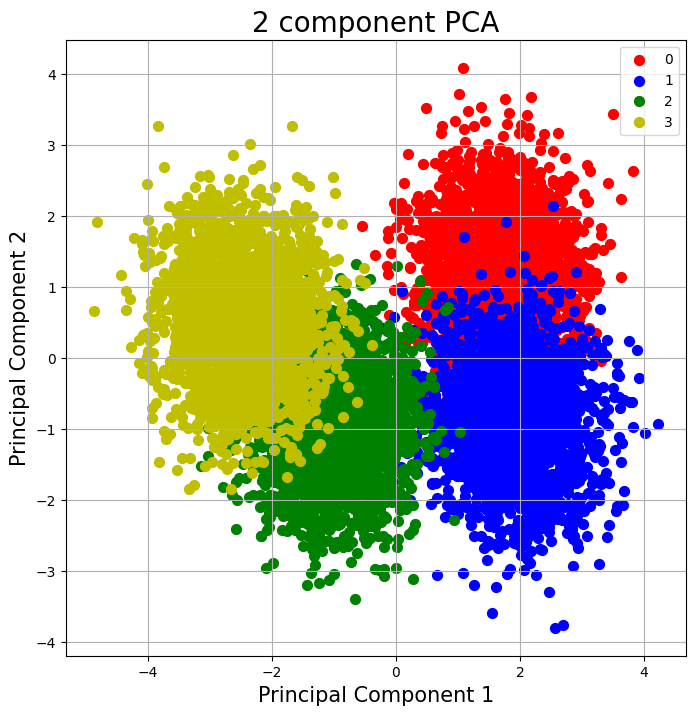

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [86]:
kmeans_tsne = KMeans(n_clusters=4,init='k-means++')

In [87]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=4)

In [88]:
df_tsne_kmeans = df_linear.copy()

In [89]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [90]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,0.467491,9.278825,7.068561,8.782917,-8.030122,-9.583016,-1.212004,11.413573,1.459564,7.276970,0,0,1
1,-11.592235,7.412776,8.671865,-16.954165,-16.564488,-8.471637,-8.622948,1.290722,-5.536911,-12.644896,1,0,2
2,-1.872588,7.716225,7.327901,-13.593380,-8.180689,-4.530203,-9.621116,3.716095,-4.204219,-4.719373,1,0,2
3,-0.360377,1.150108,-4.331577,-6.873749,3.792235,-0.889219,-4.123714,-11.181592,-4.595532,-8.470683,2,2,3
4,0.090823,9.554719,5.274735,0.609368,-11.952908,-10.086013,-10.949472,12.300018,3.873933,-4.806219,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.087723,5.754271,5.432613,-12.470215,-5.260593,-14.646548,-8.456604,0.697770,2.987708,-6.035019,1,0,2
9996,10.664492,-5.758848,-10.762305,14.238793,12.842246,7.904141,2.997692,-9.194972,7.093028,-3.421145,3,1,0
9997,-4.205459,3.215102,5.721812,7.439639,-7.552248,-7.330253,-21.945606,9.619469,-3.927295,9.693450,0,0,1
9998,-5.357584,5.873093,4.027123,1.200800,-2.147839,-3.288702,-6.662106,-7.892669,3.983766,-6.306023,1,0,2


In [91]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.0295
accuracy after: 0.9381


In [92]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,0.467491,9.278825,7.068561,8.782917,-8.030122,-9.583016,-1.212004,11.413573,1.459564,7.276970,0,0,0
1,-11.592235,7.412776,8.671865,-16.954165,-16.564488,-8.471637,-8.622948,1.290722,-5.536911,-12.644896,1,0,1
2,-1.872588,7.716225,7.327901,-13.593380,-8.180689,-4.530203,-9.621116,3.716095,-4.204219,-4.719373,1,0,1
3,-0.360377,1.150108,-4.331577,-6.873749,3.792235,-0.889219,-4.123714,-11.181592,-4.595532,-8.470683,2,2,2
4,0.090823,9.554719,5.274735,0.609368,-11.952908,-10.086013,-10.949472,12.300018,3.873933,-4.806219,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.087723,5.754271,5.432613,-12.470215,-5.260593,-14.646548,-8.456604,0.697770,2.987708,-6.035019,1,0,1
9996,10.664492,-5.758848,-10.762305,14.238793,12.842246,7.904141,2.997692,-9.194972,7.093028,-3.421145,3,1,3
9997,-4.205459,3.215102,5.721812,7.439639,-7.552248,-7.330253,-21.945606,9.619469,-3.927295,9.693450,0,0,0
9998,-5.357584,5.873093,4.027123,1.200800,-2.147839,-3.288702,-6.662106,-7.892669,3.983766,-6.306023,1,0,1


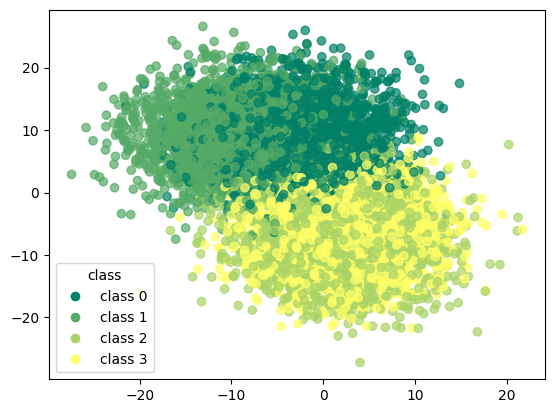

In [93]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

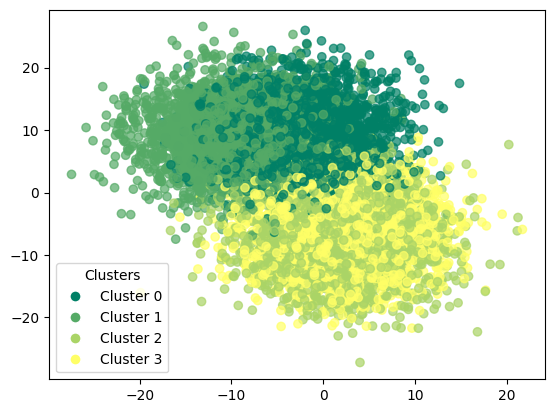

In [94]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

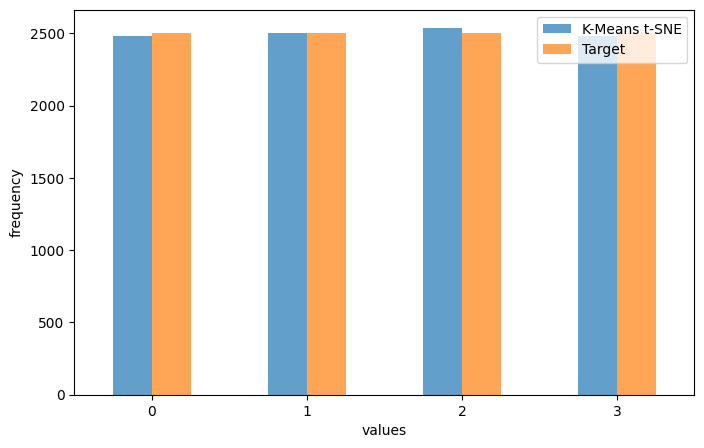

In [95]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [96]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[2305  176   19    0]
 [ 167 2315   18    0]
 [   8    9 2381  102]
 [   0    1  119 2380]]


# overall results

In [97]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2500
           1       0.93      0.93      0.93      2500
           2       0.94      0.95      0.95      2500
           3       0.96      0.95      0.96      2500

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [98]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2500
           1       0.91      0.91      0.91      2500
           2       0.90      0.91      0.91      2500
           3       0.92      0.92      0.92      2500

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [99]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2500
           1       0.00      0.00      0.00      2500
           2       0.97      0.94      0.95      2500
           3       0.95      0.49      0.65      2500

    accuracy                           0.61     10000
   macro avg       0.60      0.61      0.57     10000
weighted avg       0.60      0.61      0.57     10000

